# STAT207 Final Project - Airbnb Host

In [261]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import statsmodels.formula.api as smf

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=ConvergenceWarning)
warnings.filterwarnings("ignore", message="Maximum Likelihood optimization failed to")

from sklearn.metrics import confusion_matrix

## 1. Introduction

#### Research Introduction and Motivation

Understanding what makes an homestay listing reliable is important, especially with the growing popularity of online marketplaces for short & long-term homestays and experiences like Airbnb.

A predictive model that predicts the probability of verification would aid users to assess the trustworthiness and credibility of a host for more security in their booking. Verification status is often a universal signifier of trust & credibility as it usually proves a host has undergone a verification process by Airbnb, which may involve providing identification documents. Airbnb claims its verification process confirms a host’s personal information, “such as your legal name, address, phone number, and other contact details”(Airbnb, Inc., 2023). They may also ask for a photo of the host’s government ID and a selfie.

Airbnb guests could benefit from this predictive model, as “guests prefer to stay with verified hosts to ensure a smooth rental process and accountability”(Krone, 2023). Airbnb hosts could also use the predictive model to tailor its marketing and communication strategies. Highlighting verified hosts in promotional efforts can attract more users, emphasizing the safety and reliability of their listing. Both people would desire a model that is better at classifying the positives of our response variable, verification. For hosts, a model that accurately identifies verified hosts could help hosts stand out, potentially leading to more bookings. Guests also benefit from a model that accurately classifies positive verifications, as it could aid in identifying listings with trustworthy hosts, providing a higher sense of safety & security in the booking.

#### Citations:

* Krones, T. (2023, October 16). Airbnb ID Verification Time: A Guide for Hosts. Host Tools. https://hosttools.com/blog/short-term-rental-tips/airbnb-id-verification/#:~:text=Guests%20prefer%20to%20stay%20with,a%20home%20or%20Airbnb%20Experience
* Airbnb, Inc., https://www.airbnb.com/help/article/1237#:~:text=Verifying%20the%20identity%20of%20guests,where%20permitted%20under%20applicable%20laws

#### Research Goal Statement

The primary research goal that we will pursue in this lab will be to build a predictive model that effectively predicts the `probability a Seattle Airbnb host is  **verified**` for *new Seattle Airbnb listings/hosts* given some combination of the `'price', 'review_scores_rating', 'number_of_reviews', 'security_deposit', 'cleaning_fee', 'property_type'`.

* The 'price' variable represents the price of the Airbnb listing per night in USD. A higher price could be associated with a perception of higher quality, potentially influencing the probability of verification.
* The 'review_scores_rating' represents the average rating of the listing out of 100. Hosts with high review scores are more likely to be perceived as more reliable, and has potential to increase the probability of verification.
* The 'number_of_reviews' represents the number of reviews for the listing, it could display history of positive interactions potentially influencing the probability of verification.
* 'security_deposit' represents the security deposit required for the listing in USD, unverified hosts could likely demand a lower security deposit to make up for their unverified status.
* 'cleaning_fee' represents the cleaning fee required for the listing in USD, the fee amount could potentially differ for verified and unverified hosts.
* 'property_type' indicates the type of property the listing is ('House' or 'Apartment'). Expectations regarding verification could vary for different property types.

Ideally, the predictive model that we select will also be able to accurately reflect the relationship between the explanatory variables and the response variable 'Verification' (Secondary Research Goal), providing insight into which variables have the most impact on a Seattle Airbnb host's verification.

## 2. Dataset Discussion

#### Dataset Display

In [262]:
df = pd.read_csv('seattle_airbnb_listings_cleaned.csv')
df.head()

,price,review_scores_rating,number_of_reviews,security_deposit,cleaning_fee,neighborhood,property_type,room_type,accommodates,bathrooms,beds,host_response_time,host_response_rate,host_is_superhost,host_has_profile_pic,host_identity_verified
0,300,100,24,500,95,Wallingford,House,Entire home/apt,5,1.5,3,within a few hours,1.0,t,t,t
1,149,96,11,300,105,Wallingford,Apartment,Entire home/apt,6,1.0,3,within an hour,1.0,f,t,t
2,95,95,79,150,40,Wallingford,Apartment,Entire home/apt,3,1.0,2,within an hour,1.0,f,t,t
3,105,100,13,500,50,Wallingford,House,Private room,2,2.0,1,within a few hours,1.0,t,t,t
4,140,99,30,250,65,Wallingford,House,Entire home/apt,2,1.0,1,within an hour,1.0,t,t,t


In [263]:
df.shape[0]

339

#### Dataset Source

We originally found this dataset in our STAT 207 course assignments, but it is sourced from the website Inside Airbnb.

Source link:http://insideairbnb.com/get-the-data/

We downloaded this CSV file November 2023.

#### Dataset Information

The dataset contains the following information about the Airbnb listing:

price: price of the listing (per night)(in US dollars)

review_scores_rating: the average rating of the listing [0,100] (100 is the best)

number_of_reviews: the number of reviews for the listing

security_deposit: the security deposit required for the listing (in US dollars)

cleaning_fee: the cleaning fee required for the listing (in US dollars)

neighborhood: the neighborhood of Seattle the listing is located in

property_type: is the listing in a 'House' or 'Apartment'

room_type: is the listing a 'Entire home/apt', 'Private room', or 'Shared room'

accommodates: how many guests will the listing accommodate

bathrooms:how many bathrooms does the listing have

beds: how many beds does the listing have

host_response_time: how fast will the host respond to requests (on average)

host_response_rate: how consistently a host responds within 24 hours to guest inquiries and booking requests

host_has_profile_pic:does the host have a profile pic in their bio: t=True, f=False

host_identity_verified: if the host identify has been 'verified': t=True, f=False

Inside Airbnb data is sourced from publicly available information from the Airbnb site. All datasets on their website have been analyzed cleaned, and aggregated. This dataset is not necessarily inclusive of all possible types of observations. It does not include details such as location coordinates, amenities, or detailed property descriptions, all observations that could contribute to a host's verification status.

We recognize our dataset is not completely comprehensive, and we are aware our findings may be more limited to generalization, as well as areas of application becoming more limited. To make our model more generalizable to our research question, we included a 6th explanatory variable to increase its complexity.

#### Selected Variables

<u>Response Variable:</u>
We intend to use `host_identity_verified` as our response variable in determining the best model that predicts whether a host identify has been 'verified': t=True, f=False.

<u>Explanatory Variables:<u/>
`'price', 'review_scores_rating', 'number_of_reviews', 'security_deposit', 'cleaning_fee', 'property_type'.`

We chose to focus on these variables as they seemed most likely to influence or provide insights into the pricing and desirability of a listing. They also had the most variability within the dataset.

## 3. Dataset Cleaning

In [264]:
df_new = df.loc[:, ['price', 'review_scores_rating', 'number_of_reviews', 'security_deposit', 'cleaning_fee', 'property_type', 'host_identity_verified']]
df_new

,price,review_scores_rating,number_of_reviews,security_deposit,cleaning_fee,property_type,host_identity_verified
0,300,100,24,500,95,House,t
1,149,96,11,300,105,Apartment,t
2,95,95,79,150,40,Apartment,t
3,105,100,13,500,50,House,t
4,140,99,30,250,65,House,t
...,...,...,...,...,...,...,...
334,250,95,4,250,100,House,t
335,125,95,12,150,45,Apartment,t
336,100,98,10,200,89,Apartment,t
337,175,96,29,500,95,House,t


In [265]:
df_new.dtypes

price                      int64
review_scores_rating       int64
number_of_reviews          int64
security_deposit           int64
cleaning_fee               int64
property_type             object
host_identity_verified    object
dtype: object

#### Missing Value Detection and Cleaning

There are no implicit or explicit missing values in this dataset. We used the missing value detection through using dtypes and then used dropna() function to remove rows. As a result of it, we indicate that there is no missing value in price. 
Using this function (missing value cleaning technique) it has pros and cons such as pros being it will result in more accurate data,reducing the complexity of data preprocessing, and it ensures that analyses are performed on complete cases. The cons being having less dataset to work with and not having the full dataset also, it can lead to reduction in statistical power as there is a risk in potentially losing a valuable data. 

In [266]:
df_new.dropna()
df.shape[0] - df_new.shape[0] # no missing value in price

0

In [267]:
df_new['price'].value_counts()

price
100    16
69     16
150    14
115    13
40     12
       ..
124     1
35      1
168     1
147     1
154     1
Name: count, Length: 109, dtype: int64

In [268]:
df_new['review_scores_rating'].value_counts()

review_scores_rating
100    73
95     41
96     38
97     32
98     22
90     21
99     20
93     20
94     17
80     12
92      9
88      7
91      6
89      3
70      3
87      3
84      3
72      2
83      2
20      1
75      1
85      1
60      1
86      1
Name: count, dtype: int64

In [269]:
df_new['number_of_reviews'].value_counts()

number_of_reviews
1      28
4      24
2      16
5      15
6      13
       ..
115     1
124     1
91      1
43      1
81      1
Name: count, Length: 87, dtype: int64

In [270]:
df_new['cleaning_fee'].value_counts()

cleaning_fee
50     39
35     34
60     31
25     28
40     22
100    18
30     17
75     11
45     11
65     10
80      9
20      9
10      8
95      8
105     6
85      6
125     5
88      5
39      5
150     5
15      4
61      3
72      3
300     3
28      3
120     3
90      3
55      2
175     2
71      2
89      2
145     2
5       2
42      1
108     1
24      1
18      1
19      1
78      1
135     1
250     1
83      1
87      1
12      1
38      1
117     1
70      1
22      1
195     1
160     1
67      1
Name: count, dtype: int64

In [271]:
df_new['property_type'].value_counts()

property_type
Apartment    197
House        142
Name: count, dtype: int64

In [272]:
df_new['host_identity_verified'].value_counts()

host_identity_verified
t    296
f     43
Name: count, dtype: int64

#### Outlier Cleaning - Two Variable Outlier Inspection

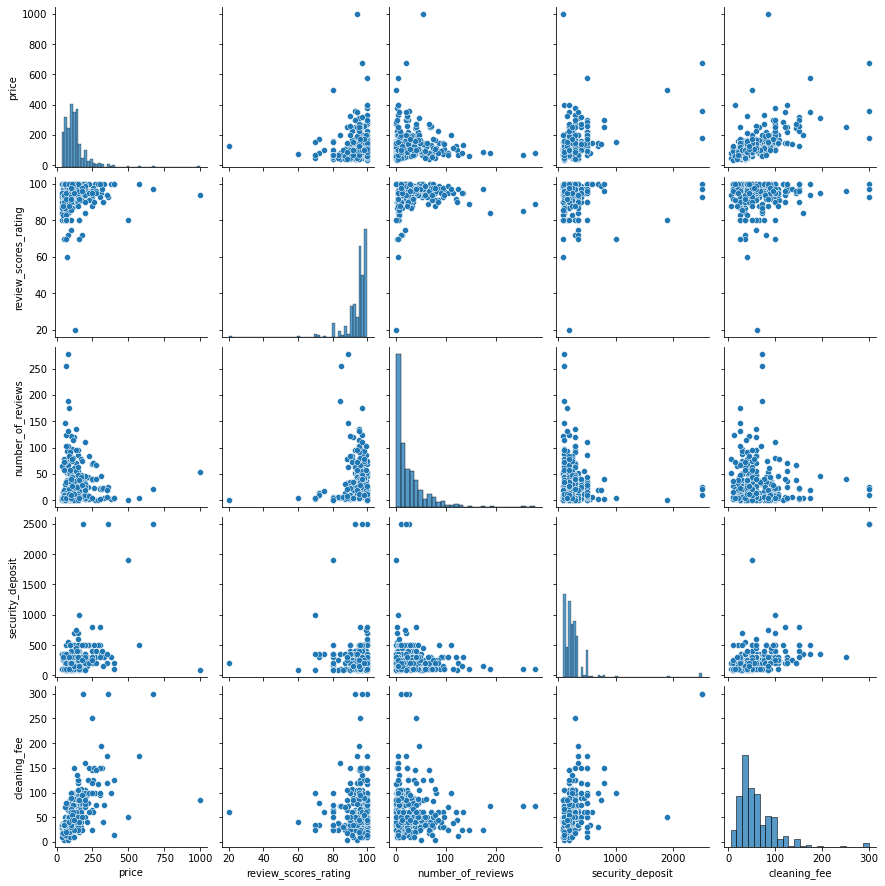

In [273]:
df_num = df_new[['price', 'review_scores_rating', 'number_of_reviews', 'security_deposit', 'cleaning_fee']]
sns.pairplot(df_num)
plt.show()

In [274]:
df_drop = df_new[df_new['price'] < 500]
df_drop = df_drop[df_drop['review_scores_rating'] > 80]
df_drop = df_drop[df_drop['number_of_reviews'] < 150]
df_drop = df_drop[df_drop['security_deposit'] < 1000]
df_drop = df_drop[df_drop['cleaning_fee'] < 200]
df_drop.reset_index(drop=True)

,price,review_scores_rating,number_of_reviews,security_deposit,cleaning_fee,property_type,host_identity_verified
0,300,100,24,500,95,House,t
1,149,96,11,300,105,Apartment,t
2,95,95,79,150,40,Apartment,t
3,105,100,13,500,50,House,t
4,140,99,30,250,65,House,t
...,...,...,...,...,...,...,...
304,250,95,4,250,100,House,t
305,125,95,12,150,45,Apartment,t
306,100,98,10,200,89,Apartment,t
307,175,96,29,500,95,House,t


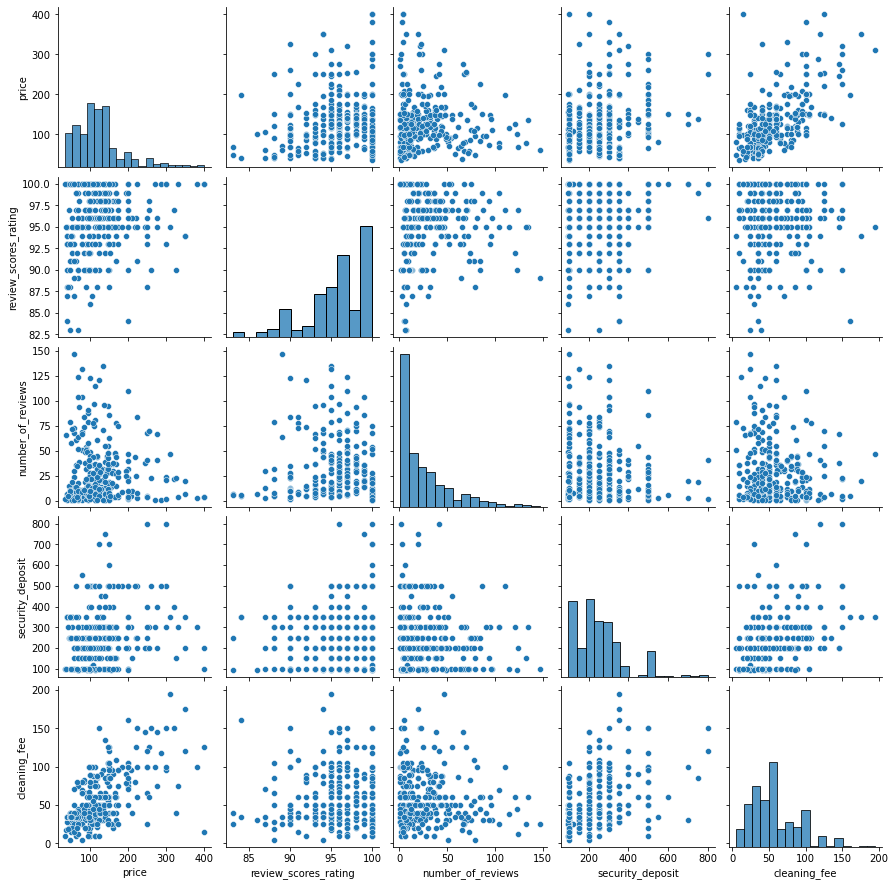

In [275]:
sns.pairplot(df_drop)
plt.show()

In [276]:
print("rows dropped:", df_new.shape[0] - df_drop.shape[0])
print("current row count:", df_drop.shape[0])
# number of rows dropped, after dropping outliers

rows dropped: 30
current row count: 309


As we didn't have any implicit missing values, we concluded that there is no further data cleaning ideas were needed to be discovered at this stage of the research.

## 4. Preliminary Analysis

#### Relationships between the Response Variable and the Explanatory Variables

We indicated that 'price', 'cleaning_fee', and 'security_deposit' have strong relationships with the response variable. Due to higher values in these variables usually correspond to a higher likelihood of the host being verified as this is indicated by the increasing median of the response variable. The 'review_scores_rating' also shows a positive relationship, with higher ratings corresponding to a higher likelihood of verification. On the other hand, we can see in the boxplot that 'number_of_reviews' have weaker relationship with the host_identity_verified as how the spread and the median of the identity verified don't show a clear trend whether they increase or decrease as number of reviews change. This indicates that the quantity of reviews alone might not be a significant predictor of verification status. In summary, financial-related variables (price, cleaning fee, security deposit) and the quality indicator 'review_scores_rating' seem to have stronger relationships with the likelihood of a host being verified on Airbnb. In contrast, 'number_of_reviews' and 'property_type' may be less impactful in predicting verification status.








In [277]:
df_drop['y'] = df_drop['host_identity_verified'].replace({'t':1, 'f':0})
df_drop.reset_index(drop=True)

,price,review_scores_rating,number_of_reviews,security_deposit,cleaning_fee,property_type,host_identity_verified,y
0,300,100,24,500,95,House,t,1
1,149,96,11,300,105,Apartment,t,1
2,95,95,79,150,40,Apartment,t,1
3,105,100,13,500,50,House,t,1
4,140,99,30,250,65,House,t,1
...,...,...,...,...,...,...,...,...
304,250,95,4,250,100,House,t,1
305,125,95,12,150,45,Apartment,t,1
306,100,98,10,200,89,Apartment,t,1
307,175,96,29,500,95,House,t,1


In [278]:
data_types = df_drop.dtypes
num_cols = data_types[(data_types=='int64') | (data_types=='float64')].index 
num_cols = num_cols.drop('y')
num_cols

Index(['price', 'review_scores_rating', 'number_of_reviews',
       'security_deposit', 'cleaning_fee'],
      dtype='object')

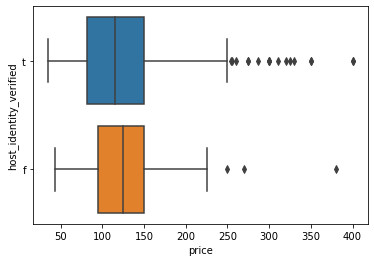

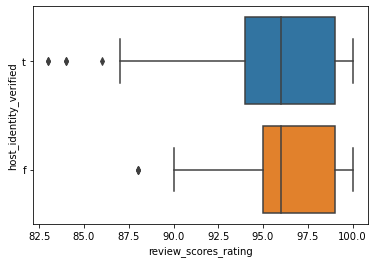

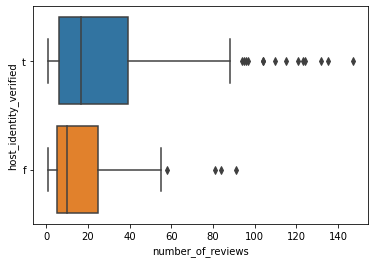

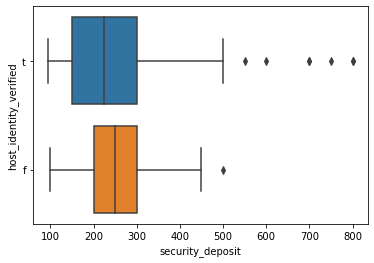

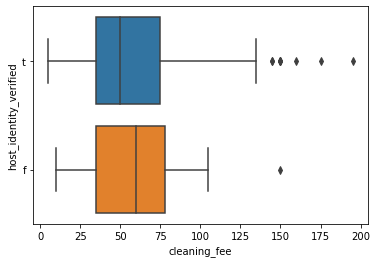

In [279]:
for col in num_cols:
    sns.boxplot(x=col, y='host_identity_verified', data=df_drop) 
    plt.show()

In [280]:
# relationship betwen categorical explanatory varialbe 'property_type' and respons variable 'host_identity_verified'
rel_var = pd.crosstab(df_drop['property_type'], df_drop['host_identity_verified'], normalize='index')
rel_var

host_identity_verified,f,t
property_type,,
Apartment,0.158470,0.841530
House,0.063492,0.936508


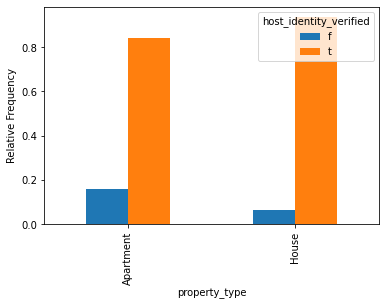

In [281]:
rel_var.plot.bar()
plt.ylabel('Relative Frequency')
plt.show()

#### Relationships between Explanatory Variable Pairs
We indicated that there are visible associations between few explanatory variables. We found that there is a positive correlation of price, security deposit, and cleaning fee from the plots. We believe that it might be due to the listings with higher prices tend to require higher deposits and cleaning fee. Hence, that would suggest that more expensive listings on the platform are associated with higher incidental costs. On the other hand, the data does not display any strong linear patterns between the quality or quantity of reviews and the pricing structure of the listings. This separation suggests that the perceived quality of a listing, as indicated by review scores, and the host's experience, as suggested by the number of reviews, are less likely to be directly influenced by the financial parameters set by the hosts on the platform.




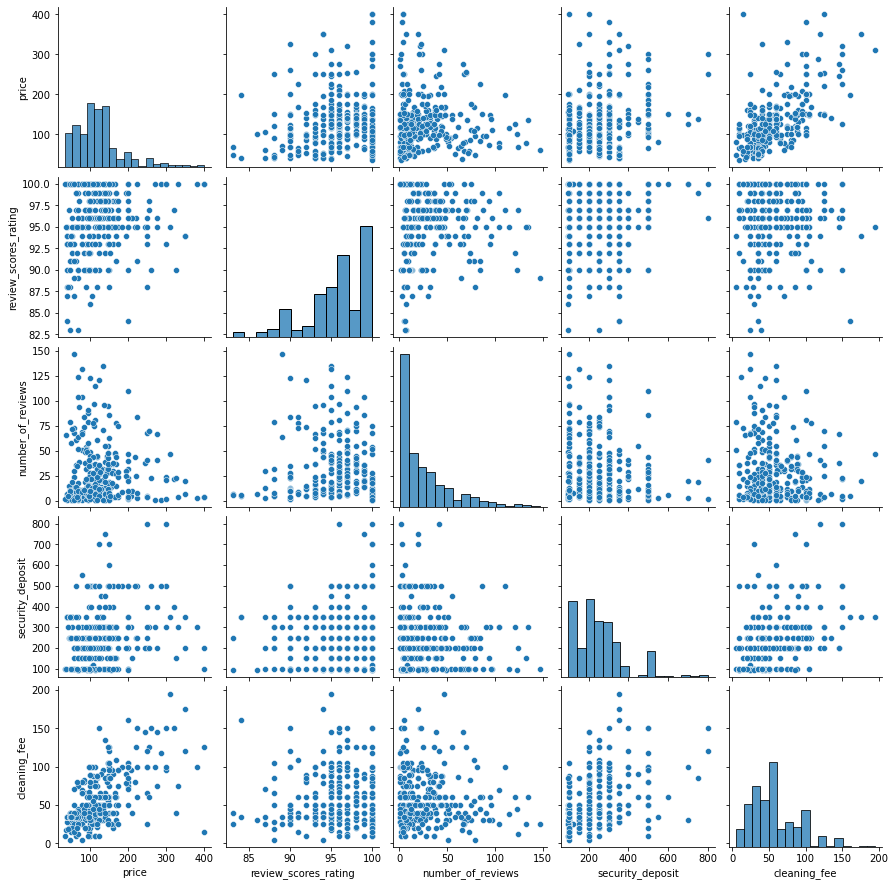

In [282]:
df_num = df_drop[['price', 'review_scores_rating', 'number_of_reviews', 'security_deposit', 'cleaning_fee']].reset_index(drop=True)
sns.pairplot(df_num)
plt.show()

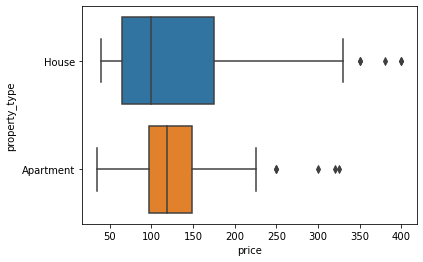

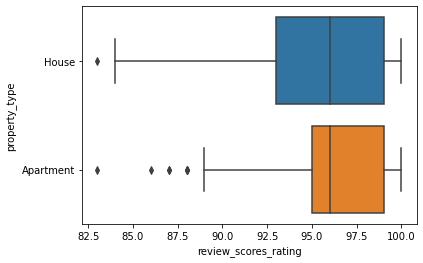

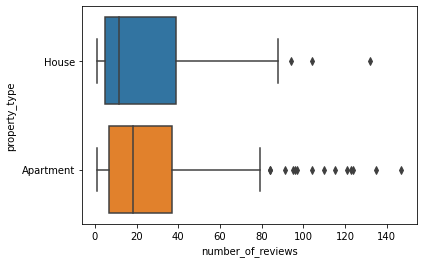

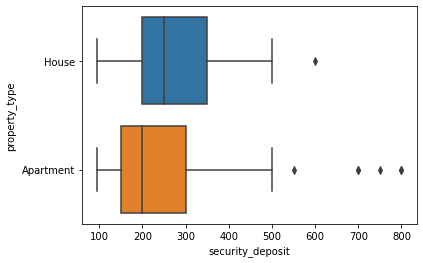

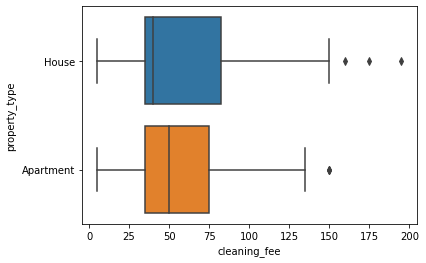

In [283]:
for col in num_cols:
    sns.boxplot(x=col, y='property_type', data=df_drop) 
    plt.show()

#### Interaction Effects
The regression outputs and interaction plots indicate that there are no strong interaction effects between the numerical explanatory variables (price, review scores rating, number of reviews, security deposit, and cleaning fee) and the categorical variable in predicting the response variable. The coefficients for these numerical variables are mostly not statistically significant, suggesting any interaction effect with the categorical variable is weak or non-existent as per the data provided.

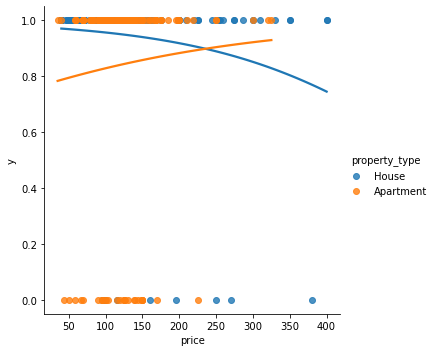

Optimization terminated successfully.
         Current function value: 0.222488
         Iterations 7


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,3.7672,0.751,5.015,0.000,2.295,5.240
price,-0.0067,0.003,-1.937,0.053,-0.014,7.87e-05


Optimization terminated successfully.
         Current function value: 0.434711
         Iterations 6


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,1.1298,0.615,1.838,0.066,-0.075,2.335
price,0.0045,0.005,0.908,0.364,-0.005,0.014


In [284]:
# x = numerical exp var, y = resp var, hue = categorical exp var
sns.lmplot(x='price', y='y', hue='property_type', data=df_drop, logistic=True, ci=False)
plt.show()

simple_log_model=smf.logit("y~property_type+price", data=df_drop[df_drop['property_type']=='House']).fit()
display(simple_log_model.summary().tables[1])

simple_log_model=smf.logit("y~property_type+price", data=df_drop[df_drop['property_type']=='Apartment']).fit()
display(simple_log_model.summary().tables[1])

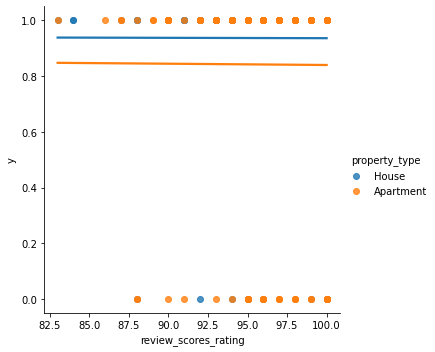

Optimization terminated successfully.
         Current function value: 0.236468
         Iterations 7


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,2.8994,8.867,0.327,0.744,-14.480,20.279
review_scores_rating,-0.0022,0.093,-0.023,0.981,-0.184,0.180


Optimization terminated successfully.
         Current function value: 0.437114
         Iterations 6


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,2.0033,5.542,0.361,0.718,-8.860,12.866
review_scores_rating,-0.0035,0.058,-0.060,0.952,-0.116,0.110


In [285]:
# x = numerical exp var, y = resp var, hue = categorical exp var
sns.lmplot(x='review_scores_rating', y='y', hue='property_type', data=df_drop, logistic=True, ci=False)
plt.show()

simple_log_model=smf.logit("y~property_type+review_scores_rating", data=df_drop[df_drop['property_type']=='House']).fit()
display(simple_log_model.summary().tables[1])

simple_log_model=smf.logit("y~property_type+review_scores_rating", data=df_drop[df_drop['property_type']=='Apartment']).fit()
display(simple_log_model.summary().tables[1])

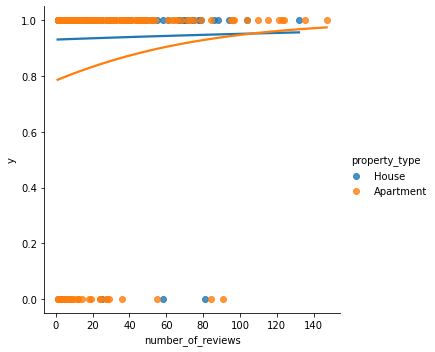

Optimization terminated successfully.
         Current function value: 0.236175
         Iterations 7


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,2.6007,0.488,5.334,0.000,1.645,3.556
number_of_reviews,0.0038,0.014,0.267,0.790,-0.024,0.031


Optimization terminated successfully.
         Current function value: 0.427175
         Iterations 6


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,1.2889,0.280,4.609,0.000,0.741,1.837
number_of_reviews,0.0161,0.010,1.690,0.091,-0.003,0.035


In [286]:
# x = numerical exp var, y = resp var, hue = categorical exp var
sns.lmplot(x='number_of_reviews', y='y', hue='property_type', data=df_drop, logistic=True, ci=False)
plt.show()

simple_log_model=smf.logit("y~property_type+number_of_reviews", data=df_drop[df_drop['property_type']=='House']).fit()
display(simple_log_model.summary().tables[1])

simple_log_model=smf.logit("y~property_type+number_of_reviews", data=df_drop[df_drop['property_type']=='Apartment']).fit()
display(simple_log_model.summary().tables[1])

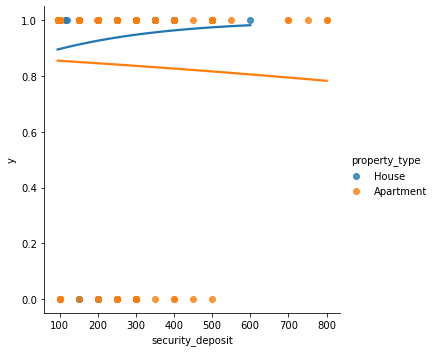

Optimization terminated successfully.
         Current function value: 0.231515
         Iterations 7


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,1.7918,0.858,2.088,0.037,0.110,3.474
security_deposit,0.0037,0.004,1.065,0.287,-0.003,0.011


Optimization terminated successfully.
         Current function value: 0.436461
         Iterations 6


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,1.8431,0.407,4.527,0.000,1.045,2.641
security_deposit,-0.0007,0.001,-0.500,0.617,-0.003,0.002


In [287]:
# x = numerical exp var, y = resp var, hue = categorical exp var
sns.lmplot(x='security_deposit', y='y', hue='property_type', data=df_drop, logistic=True, ci=False)
plt.show()

simple_log_model=smf.logit("y~property_type+security_deposit", data=df_drop[df_drop['property_type']=='House']).fit()
display(simple_log_model.summary().tables[1])

simple_log_model=smf.logit("y~property_type+security_deposit", data=df_drop[df_drop['property_type']=='Apartment']).fit()
display(simple_log_model.summary().tables[1])

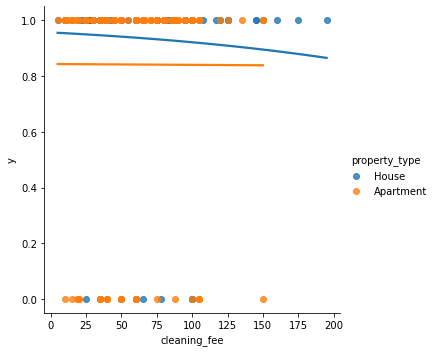

Optimization terminated successfully.
         Current function value: 0.234392
         Iterations 7


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,3.0936,0.683,4.527,0.000,1.754,4.433
cleaning_fee,-0.0063,0.008,-0.749,0.454,-0.023,0.010


Optimization terminated successfully.
         Current function value: 0.437121
         Iterations 6


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,1.6825,0.443,3.800,0.000,0.815,2.550
cleaning_fee,-0.0002,0.007,-0.033,0.974,-0.014,0.013


In [288]:
# x = numerical exp var, y = resp var, hue = categorical exp var
sns.lmplot(x='cleaning_fee', y='y', hue='property_type', data=df_drop, logistic=True, ci=False)
plt.show()

simple_log_model=smf.logit("y~property_type+cleaning_fee", data=df_drop[df_drop['property_type']=='House']).fit()
display(simple_log_model.summary().tables[1])

simple_log_model=smf.logit("y~property_type+cleaning_fee", data=df_drop[df_drop['property_type']=='Apartment']).fit()
display(simple_log_model.summary().tables[1])

## 5. Model Data Preprocessing

#### Features Matrix and Target Array

In [289]:
# Features matrix
feat_mat = df_drop.drop(['y'], axis=1).reset_index(drop=True)
feat_mat

,price,review_scores_rating,number_of_reviews,security_deposit,cleaning_fee,property_type,host_identity_verified
0,300,100,24,500,95,House,t
1,149,96,11,300,105,Apartment,t
2,95,95,79,150,40,Apartment,t
3,105,100,13,500,50,House,t
4,140,99,30,250,65,House,t
...,...,...,...,...,...,...,...
304,250,95,4,250,100,House,t
305,125,95,12,150,45,Apartment,t
306,100,98,10,200,89,Apartment,t
307,175,96,29,500,95,House,t


In [290]:
# Target array
tar_arr = df_drop['y'].reset_index(drop=True)
tar_arr

0      1
1      1
2      1
3      1
4      1
      ..
304    1
305    1
306    1
307    1
308    1
Name: y, Length: 309, dtype: int64

#### Explantory Variable Scaling
* Because of our secondary research goal which focuses on model interpretability, you should scale your numerical explanatory variables.

In [291]:
num_exp = df_drop[['price', 'review_scores_rating', 'number_of_reviews', 'security_deposit', 'cleaning_fee']].reset_index(drop=True)
num_exp

,price,review_scores_rating,number_of_reviews,security_deposit,cleaning_fee
0,300,100,24,500,95
1,149,96,11,300,105
2,95,95,79,150,40
3,105,100,13,500,50
4,140,99,30,250,65
...,...,...,...,...,...
304,250,95,4,250,100
305,125,95,12,150,45
306,100,98,10,200,89
307,175,96,29,500,95


In [292]:
num_exp.std()

price                    66.881944
review_scores_rating      3.720319
number_of_reviews        28.994854
security_deposit        130.886718
cleaning_fee             33.347547
dtype: float64

In [293]:
from sklearn.preprocessing import StandardScaler

scaler_training = StandardScaler()
scaled_expl_vars = scaler_training.fit_transform(num_exp)
num_scal = pd.DataFrame(scaled_expl_vars, columns=num_exp.columns)
num_scal

,price,review_scores_rating,number_of_reviews,security_deposit,cleaning_fee
0,2.575576,1.130070,-0.099274,1.904157,1.124546
1,0.314205,0.053149,-0.548357,0.373639,1.424905
2,-0.494498,-0.216081,1.800691,-0.774249,-0.527426
3,-0.344738,1.130070,-0.479267,1.904157,-0.227067
4,0.179421,0.860839,0.107994,-0.008990,0.223471
...,...,...,...,...,...
304,1.826778,-0.216081,-0.790171,-0.008990,1.274726
305,-0.045219,-0.216081,-0.513812,-0.774249,-0.377246
306,-0.419618,0.591609,-0.582902,-0.391619,0.944331
307,0.703580,0.053149,0.073450,1.904157,1.124546


#### Indicator Variables
* Be sure to translate your categorical explanatory variable(s) into indicator variables.

In [294]:
df_dum = pd.get_dummies(df_drop['property_type'], drop_first=True, dtype=int).reset_index(drop=True)
df_dum

,House
0,1
1,0
2,0
3,1
4,1
...,...
304,1
305,0
306,0
307,1


In [295]:
exp_var = pd.concat([num_scal, df_dum], axis=1)
exp_var

,price,review_scores_rating,number_of_reviews,security_deposit,cleaning_fee,House
0,2.575576,1.130070,-0.099274,1.904157,1.124546,1
1,0.314205,0.053149,-0.548357,0.373639,1.424905,0
2,-0.494498,-0.216081,1.800691,-0.774249,-0.527426,0
3,-0.344738,1.130070,-0.479267,1.904157,-0.227067,1
4,0.179421,0.860839,0.107994,-0.008990,0.223471,1
...,...,...,...,...,...,...
304,1.826778,-0.216081,-0.790171,-0.008990,1.274726,1
305,-0.045219,-0.216081,-0.513812,-0.774249,-0.377246,0
306,-0.419618,0.591609,-0.582902,-0.391619,0.944331,0
307,0.703580,0.053149,0.073450,1.904157,1.124546,1


## 6. Feature Selection with k-Fold Cross-Validation

In order to make more robust estimates as to how a given model might perform when classifying observations in NEW datasets, we will use k=5 fold cross-validation to assess a given models performance (rather than the train-test-split method). Specifically, we will measure the average test AUC of a given model.

Thus, we would like to select a logistic regression model that has the highest average test AUC in the k=5 fold cross- validation.

You can choose from one of three feature selection techniques below which will attempt to find this logistic regression model with the highest average test AUC.

#### OPTION A: Backwards Elimination with Cross-Validation
Perform a backwards elimination algorithm that tries to select the logistic regression model with the highest average test AUC in the k=5 fold cross-validation.

In [296]:
df_concat = pd.concat([num_scal, df_dum, df_drop['y'].reset_index(drop=True)], axis=1)
df_concat

,price,review_scores_rating,number_of_reviews,security_deposit,cleaning_fee,House,y
0,2.575576,1.130070,-0.099274,1.904157,1.124546,1,1
1,0.314205,0.053149,-0.548357,0.373639,1.424905,0,1
2,-0.494498,-0.216081,1.800691,-0.774249,-0.527426,0,1
3,-0.344738,1.130070,-0.479267,1.904157,-0.227067,1,1
4,0.179421,0.860839,0.107994,-0.008990,0.223471,1,1
...,...,...,...,...,...,...,...
304,1.826778,-0.216081,-0.790171,-0.008990,1.274726,1,1
305,-0.045219,-0.216081,-0.513812,-0.774249,-0.377246,0,1
306,-0.419618,0.591609,-0.582902,-0.391619,0.944331,0,1
307,0.703580,0.053149,0.073450,1.904157,1.124546,1,1


In [297]:
from sklearn.model_selection import KFold, cross_val_score
cross_val = KFold(n_splits=5, shuffle=True, random_state=207)
cross_val

KFold(n_splits=5, random_state=207, shuffle=True)

In [298]:
#iteration 1

rem_none_0 = df_concat[['price', 'review_scores_rating', 'number_of_reviews', 'security_deposit', 'cleaning_fee', 'House']]
rem_price_0 = df_concat[['review_scores_rating', 'number_of_reviews', 'security_deposit', 'cleaning_fee', 'House']]
rem_revscore_0 = df_concat[['price', 'number_of_reviews', 'security_deposit', 'cleaning_fee', 'House']]
rem_numrev_0 = df_concat[['price', 'review_scores_rating', 'security_deposit', 'cleaning_fee', 'House']]
rem_deposit_0 = df_concat[['price', 'review_scores_rating', 'number_of_reviews', 'cleaning_fee', 'House']]
rem_cleaningfee_0 = df_concat[['price', 'review_scores_rating', 'number_of_reviews', 'security_deposit', 'House']]
rem_house_0 = df_concat[['price', 'review_scores_rating', 'number_of_reviews', 'security_deposit', 'cleaning_fee']]
rem_none_0

,price,review_scores_rating,number_of_reviews,security_deposit,cleaning_fee,House
0,2.575576,1.130070,-0.099274,1.904157,1.124546,1
1,0.314205,0.053149,-0.548357,0.373639,1.424905,0
2,-0.494498,-0.216081,1.800691,-0.774249,-0.527426,0
3,-0.344738,1.130070,-0.479267,1.904157,-0.227067,1
4,0.179421,0.860839,0.107994,-0.008990,0.223471,1
...,...,...,...,...,...,...
304,1.826778,-0.216081,-0.790171,-0.008990,1.274726,1
305,-0.045219,-0.216081,-0.513812,-0.774249,-0.377246,0
306,-0.419618,0.591609,-0.582902,-0.391619,0.944331,0
307,0.703580,0.053149,0.073450,1.904157,1.124546,1


In [299]:
from sklearn.linear_model import LogisticRegression

log_reg_mod = LogisticRegression()
test_fold_auc = cross_val_score(log_reg_mod, rem_none_0, tar_arr, scoring = 'roc_auc', cv = cross_val)
test_fold_auc.mean()

0.6190450485187328

In [300]:
auc_price_0 = cross_val_score(log_reg_mod, rem_price_0, tar_arr, scoring = 'roc_auc', cv = cross_val)
auc_price_0.mean()

0.6342893656051551

In [301]:
auc_revscore_0 = cross_val_score(log_reg_mod, rem_revscore_0, tar_arr, scoring = 'roc_auc', cv = cross_val)
auc_revscore_0.mean()

0.6349251771620192

In [302]:
auc_numrev_0 = cross_val_score(log_reg_mod, rem_numrev_0, tar_arr, scoring = 'roc_auc', cv = cross_val)
auc_numrev_0.mean()

0.5333100087047455

In [303]:
auc_deposit_0 = cross_val_score(log_reg_mod, rem_deposit_0, tar_arr, scoring = 'roc_auc', cv = cross_val)
auc_deposit_0.mean()

0.6274904919641762

In [304]:
auc_cleaningfee_0 = cross_val_score(log_reg_mod, rem_cleaningfee_0, tar_arr, scoring = 'roc_auc', cv = cross_val)
auc_cleaningfee_0.mean()

0.6226877070298122

In [305]:
auc_house_0 = cross_val_score(log_reg_mod, rem_house_0, tar_arr, scoring = 'roc_auc', cv = cross_val)
auc_house_0.mean()

0.5418762524025682

In [306]:
#iteration 2 (remove review_scores_rating)

rem_revscore_1 = rem_revscore_0
rem_price_1 = df_concat[['number_of_reviews', 'security_deposit', 'cleaning_fee', 'House']]
rem_numrev_1 = df_concat[['price', 'security_deposit', 'cleaning_fee', 'House']]
rem_deposit_1 = df_concat[['price', 'number_of_reviews', 'cleaning_fee', 'House']]
rem_cleaningfee_1 = df_concat[['price', 'number_of_reviews', 'security_deposit', 'House']]
rem_house_1 = df_concat[['price', 'number_of_reviews', 'security_deposit', 'cleaning_fee']]
rem_revscore_1

,price,number_of_reviews,security_deposit,cleaning_fee,House
0,2.575576,-0.099274,1.904157,1.124546,1
1,0.314205,-0.548357,0.373639,1.424905,0
2,-0.494498,1.800691,-0.774249,-0.527426,0
3,-0.344738,-0.479267,1.904157,-0.227067,1
4,0.179421,0.107994,-0.008990,0.223471,1
...,...,...,...,...,...
304,1.826778,-0.790171,-0.008990,1.274726,1
305,-0.045219,-0.513812,-0.774249,-0.377246,0
306,-0.419618,-0.582902,-0.391619,0.944331,0
307,0.703580,0.073450,1.904157,1.124546,1


In [307]:
auc_price_1 = cross_val_score(log_reg_mod, rem_price_1, tar_arr, scoring = 'roc_auc', cv = cross_val)
auc_price_1.mean()

0.6488102978892453

In [308]:
auc_revscore_1 = cross_val_score(log_reg_mod, rem_numrev_1, tar_arr, scoring = 'roc_auc', cv = cross_val)
auc_revscore_1.mean()

0.5697380981591507

In [309]:
auc_deposit_1 = cross_val_score(log_reg_mod, rem_deposit_1, tar_arr, scoring = 'roc_auc', cv = cross_val)
auc_deposit_1.mean()

0.637839806392438

In [310]:
auc_cleaningfee_1 = cross_val_score(log_reg_mod, rem_cleaningfee_1, tar_arr, scoring = 'roc_auc', cv = cross_val)
auc_cleaningfee_1.mean()

0.6429159437054174

In [311]:
auc_house_1 = cross_val_score(log_reg_mod, rem_house_1, tar_arr, scoring = 'roc_auc', cv = cross_val)
auc_house_1.mean()

0.5909499564762722

In [312]:
#iteration 3 (removed price)

rem_revscore_price_2 = rem_price_1
rem_numrev_2 = df_concat[['security_deposit', 'cleaning_fee', 'House']]
rem_deposit_2 = df_concat[['number_of_reviews', 'cleaning_fee', 'House']]
rem_cleaningfee_2 = df_concat[['number_of_reviews', 'security_deposit', 'House']]
rem_house_2 = df_concat[['number_of_reviews', 'security_deposit', 'cleaning_fee']]
rem_revscore_price_2

,number_of_reviews,security_deposit,cleaning_fee,House
0,-0.099274,1.904157,1.124546,1
1,-0.548357,0.373639,1.424905,0
2,1.800691,-0.774249,-0.527426,0
3,-0.479267,1.904157,-0.227067,1
4,0.107994,-0.008990,0.223471,1
...,...,...,...,...
304,-0.790171,-0.008990,1.274726,1
305,-0.513812,-0.774249,-0.377246,0
306,-0.582902,-0.391619,0.944331,0
307,0.073450,1.904157,1.124546,1


In [313]:
auc_revscore_2 = cross_val_score(log_reg_mod, rem_numrev_2, tar_arr, scoring = 'roc_auc', cv = cross_val)
auc_revscore_2.mean()

0.5805718988613726

In [314]:
auc_deposit_2 = cross_val_score(log_reg_mod, rem_deposit_2, tar_arr, scoring = 'roc_auc', cv = cross_val)
auc_deposit_2.mean()

0.6596482099771575

In [315]:
auc_cleaningfee_2 = cross_val_score(log_reg_mod, rem_cleaningfee_2, tar_arr, scoring = 'roc_auc', cv = cross_val)
auc_cleaningfee_2.mean()

0.6622643146327357

In [316]:
auc_house_2 = cross_val_score(log_reg_mod, rem_house_2, tar_arr, scoring = 'roc_auc', cv = cross_val)
auc_house_2.mean()

0.5871063439484492

In [317]:
#iteration 4 (removed cleaning_fee)

rem_revscore_price_cleaningfee_2 = rem_cleaningfee_2
rem_numrev_3 = df_concat[['security_deposit', 'House']]
rem_deposit_3 = df_concat[['number_of_reviews', 'House']]
rem_house_3 = df_concat[['number_of_reviews', 'security_deposit']]
rem_revscore_price_cleaningfee_2

,number_of_reviews,security_deposit,House
0,-0.099274,1.904157,1
1,-0.548357,0.373639,0
2,1.800691,-0.774249,0
3,-0.479267,1.904157,1
4,0.107994,-0.008990,1
...,...,...,...
304,-0.790171,-0.008990,1
305,-0.513812,-0.774249,0
306,-0.582902,-0.391619,0
307,0.073450,1.904157,1


In [318]:
auc_revscore_3 = cross_val_score(log_reg_mod, rem_numrev_3, tar_arr, scoring = 'roc_auc', cv = cross_val)
auc_revscore_3.mean()

0.5715832632280001

In [319]:
auc_deposit_3 = cross_val_score(log_reg_mod, rem_deposit_3, tar_arr, scoring = 'roc_auc', cv = cross_val)
auc_deposit_3.mean()

0.6654304759567917

In [320]:
auc_house_3 = cross_val_score(log_reg_mod, rem_house_3, tar_arr, scoring = 'roc_auc', cv = cross_val)
auc_house_3.mean()

0.5979671352039773

In [321]:
#iteration 5 (removed security_deposit)

rem_revscore_price_cleaningfee_deposit_4 = rem_deposit_3
rem_numrev_4 = df_concat[['House']]
rem_house_4 = df_concat[['number_of_reviews']]
rem_revscore_price_cleaningfee_deposit_4

,number_of_reviews,House
0,-0.099274,1
1,-0.548357,0
2,1.800691,0
3,-0.479267,1
4,0.107994,1
...,...,...
304,-0.790171,1
305,-0.513812,0
306,-0.582902,0
307,0.073450,1


In [322]:
auc_revscore_4 = cross_val_score(log_reg_mod, rem_numrev_4, tar_arr, scoring = 'roc_auc', cv = cross_val)
auc_revscore_4.mean()

0.6111562706299549

In [323]:
auc_house_4 = cross_val_score(log_reg_mod, rem_house_4, tar_arr, scoring = 'roc_auc', cv = cross_val)
auc_house_4.mean()

0.5909796782165203

In [324]:
best_model = cross_val_score(log_reg_mod, rem_deposit_3, tar_arr, scoring = 'roc_auc', cv = cross_val)
best_model.mean()

0.6654304759567917

## 7. Best Model Discussion

We found that iteration #4 had the highest AUC and we decided to stop at iteration 4 to continue our exploration in the best model.




In [325]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_concat, test_size=0.2, random_state=207)
print(df_train.shape[0]/df_concat.shape[0])
df_train.head()

0.7993527508090615


,price,review_scores_rating,number_of_reviews,security_deposit,cleaning_fee,House,y
53,-1.318176,-2.369922,-0.824716,0.756269,-0.677605,1,1
2,-0.494498,-0.216081,1.800691,-0.774249,-0.527426,0,1
254,-0.494498,1.130070,-0.721081,-1.156878,-1.128143,0,0
131,-0.719137,1.130070,-0.893805,-0.008990,0.223471,0,1
222,-1.018657,-1.831462,4.149739,-1.156878,-0.977964,0,1


In [326]:
print(df_test.shape[0]/df_concat.shape[0])
df_test.head()

0.20064724919093851


,price,review_scores_rating,number_of_reviews,security_deposit,cleaning_fee,House,y
82,-0.299810,1.130070,-0.651992,-1.003826,-0.977964,1,1
182,-0.569378,-1.562232,-0.859261,-1.156878,-0.527426,0,0
268,1.077979,-0.216081,-0.790171,0.373639,1.274726,1,1
32,-1.318176,-3.177613,-0.721081,0.756269,-0.677605,1,1
116,-0.120099,0.053149,-0.306543,-0.391619,0.523829,0,1


In [327]:
x_train = df_train[['number_of_reviews', 'House']]
y_train = df_train['y']
x_test = df_test[['number_of_reviews', 'House']]
y_test = df_test['y']

In [328]:
best_model = LogisticRegression(penalty='none', solver='newton-cg', max_iter=1000)
best_model.fit(x_train, y_train)

LogisticRegression(max_iter=1000, penalty='none', solver='newton-cg')

In [329]:
dfcoef = pd.DataFrame(best_model.coef_.T, columns=['Elimination'], index=x_train.columns)
dfcoef.loc['Intercept'] = best_model.intercept_[0]
dfcoef

,Elimination
number_of_reviews,0.304616
House,1.012919
Intercept,1.603476


$\hat{y}=\frac{1}{1+e^{-(1.603476 + 0.304616*number\_of\_reviews + 1.012919*House)}}$

In [330]:
df_test[['number_of_reviews', 'House']].corr()

,number_of_reviews,House
number_of_reviews,1.000000,-0.043532
House,-0.043532,1.000000


Multicollinearity: 
The low correlation between 'number_of_reviews' and 'House' indicates there's no multicollinearity according to our threshold of 0.7. This means these variables can be used together in our model without the risk of inflating the estimates due to overlapping information.

Slope Interpretations

We found that number_of_reviews has the odd of 1.3561 and that means it doesn't give a big influence on identity verified with each additional review increasing the odds by about 3.6%. On the other hand, the odds ratio for 'House' is 2.7536 that is suggesting a stronger influence than the odd of 1.029 that number_of_reviews has, with houses having a 17.5% higher odds of the response variable occurring compared to the baseline. Hence, we concluded that "House" has the larger effect on the probability of the outcome.


Overfitting Explanatory Variables:

Based on our feature selection, we suggested that the "best model" (AUC of 0.772) probably left out variables that led to overfitting. High p-values suggest that these overfitting factors had weak associations with the response variable, or they may have had significant correlations with other explanatory variables. If it is fixed then the model would now be more straightforward, which decreases overfitting and increases its ability to predict future data. Through the feature selection process, the most valuable predictors, like "House" or "number_of_reviews," were able to be taken out of the model, offering a more complete and dependable forecasting tool for the response variable.

In [331]:
df_test['predictive_prob'] = best_model.predict(x_test)
df_test[['predictive_prob', 'y']].head()

,predictive_prob,y
82,1,1
182,1,0
268,1,1
32,1,1
116,1,1


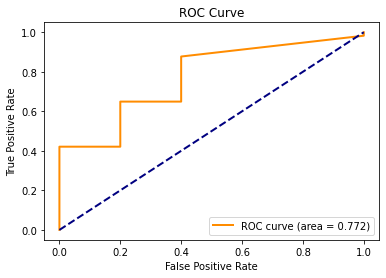

In [332]:
from sklearn.metrics import roc_auc_score, roc_curve

predictive_probs_test = best_model.predict_proba(x_test)[:,1]

fprs, tprs, thresholds = roc_curve(y_true=y_test, y_score=predictive_probs_test)
auc = roc_auc_score(y_true=y_test, y_score=predictive_probs_test)

def plot_roc(fpr, tpr, auc, lw=2):
    plt.plot(fpr, tpr, color='darkorange', lw=lw,
             label='ROC curve (area = '+str(round(auc,3))+')')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
plot_roc(fprs, tprs, auc)

Now we've made the ROC curve, we understood that the ROC curve and an AUC of 0.772 indicates that the best logistic regression model has a good ability to distinguish between the two classes of the response variable in the test dataset. The model's overall performance values closer to 1 suggest a high predictive accuracy as AUC had measure of 0 to 1. With an AUC well above 0.5, which would be random guessing, this model is considered to have a strong classification ability for this particular dataset.








Best Predictive Probability Threshold:
Now as we understood the model's ability, let's look into selecting a predictive probability threshold that best meets our research goal. We think our threshold of (FPR, TPR) = (0.4, 0.9) supports a prioritization of accurately identifying verified hosts on Airbnb. The model's sensitivity is shown through the high True Positive Rate (90%) and this means 90% of verified hosts. The threshold indicates a high False Positive Rate of 40% as well. This could mean that some people might have been mistakenly confirmed as verified. This choice supports the study objective that places a higher priority on capturing verified hosts.

## 8. Additional Analysis/Insight

Our primary research goal that we pursued in this project was to build a predictive model that effectively predicts the `probability a Seattle Airbnb host is  **verified**` for *new Seattle Airbnb listings/hosts* given some combination of the `'price', 'review_scores_rating', 'number_of_reviews', 'security_deposit', 'cleaning_fee', 'property_type'`.
Now we have come to a conclusion, we wanted to add a scatterplot that will help us understand whether guests consistently rate certain types of properties higher or whether they tend to leave more reviews on certain properties. Through looking between number_of_reviews as well as the review_scores_rating, we can see which type of property is most likely to be checked out. Hence, when we know which property_type is more checked out, it could be a valuable information insights for our goal.

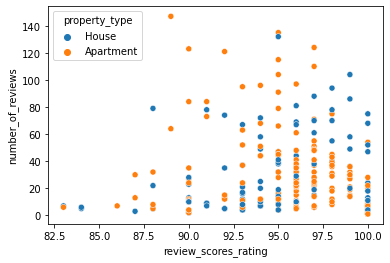

In [333]:
sns.scatterplot(x='review_scores_rating', y='number_of_reviews', hue='property_type', data=df_drop)
plt.show()

## 9. Conclusion

Recommendation

We do not know for sure our chosen best model will yield the highest possible average test AUC out of all possible models with this dataset as we only selected 6 our of 15 variables(excluded response variable verified) to create our model. A more complete analysis would have analyzed the correlation of all variables prior to selecting only the variables that are not highly correlated & demonstrate a significant impact on the outcome to avoid issues such as multicollinearity and overfitting. The more complete analysis would also use multiple methods for variable selection to reduce present bias. 

Shortcomings/Caveats

A shortcoming we had during this analysis occured while conducting our backward elimination method. We found it difficult to keep track and ensure we were entering and removing the correct variables as we had 5 total iterations with 6 variables. Because our method may remove variables correlated to the response variable in early iterations, our model, we realize our model is unlikely to be the best for new datasets. 


Future Work

One idea for future work would be to conduct another analysis using another logistic regression method such as LASSO regression model to predict the response variable using new datasets. A LASSO model method is least likely to overfit as it is allowed to zero out slopes that do not bring enough predictive power, potentially improving the model's generalization ability.


## References

We originally found this dataset in our STAT 207 course assignments, but it is sourced from the website Inside Airbnb.
Source link:http://insideairbnb.com/get-the-data/
We downloaded this CSV file November 2023.

Citations:
* Krones, T. (2023, October 16). Airbnb ID Verification Time: A Guide for Hosts. Host Tools. https://hosttools.com/blog/short-term-rental-tips/airbnb-id-verification/#:~:text=Guests%20prefer%20to%20stay%20with,a%20home%20or%20Airbnb%20Experience
* Airbnb, Inc., https://www.airbnb.com/help/article/1237#:~:text=Verifying%20the%20identity%20of%20guests,where%20permitted%20under%20applicable%20laws
